In [27]:
import os, sys
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import pandas as pd

## Import the Data

In [2]:
data = pd.read_csv('../data/raw_analyst_ratings.csv')

In [13]:
print(data.head())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

In [4]:
missing_values = data.isnull().sum()
print(missing_values)

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64


## Information of the data Sample

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [15]:
data.shape

(1407328, 6)

In [16]:
time_data = data['date'].apply(lambda x: len(x.split()) > 1)
print(time_data.sum())

1407328


In [17]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\NurselamHussen-
[nltk_data]     ZOAEt\AppData\Roaming\nltk_data...


True

In [18]:
sentiment_data = data.copy()

In [19]:
sia = SentimentIntensityAnalyzer()

## Calculate the sentiment of the headlines

In [20]:
# Calculate the sentiment of the headlines
sentiment_data['sentiment'] = sentiment_data['headline'].apply(lambda x: sia.polarity_scores(text=x)['compound'])

In [21]:
sentiment_data

,Unnamed: 0,headline,url,publisher,date,stock,sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,0.0000
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,0.0000
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,0.0000
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,0.0000
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,0.2960
...,...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX,0.2023
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX,-0.3818
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX,0.0000
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX,0.0000


## Categorize the Sentiment Scores

In [22]:
# Categorize the sentiment scores
import pandas as pd


sentiment_data['sentiment_category'] = pd.cut(sentiment_data['sentiment'], bins=[-1,-0.5,-0.001,0.5,1], labels=['Very Negative', 'Negative','Neutral','Positive'])

In [23]:
sentiment_data

,Unnamed: 0,headline,url,publisher,date,stock,sentiment,sentiment_category
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,0.0000,Neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,0.0000,Neutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,0.0000,Neutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,0.0000,Neutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,0.2960,Neutral
...,...,...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX,0.2023,Neutral
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX,-0.3818,Negative
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX,0.0000,Neutral
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX,0.0000,Neutral


## Plot the sentiment Categories

In [ ]:
# To visulaize the distribution of sentiment Categories

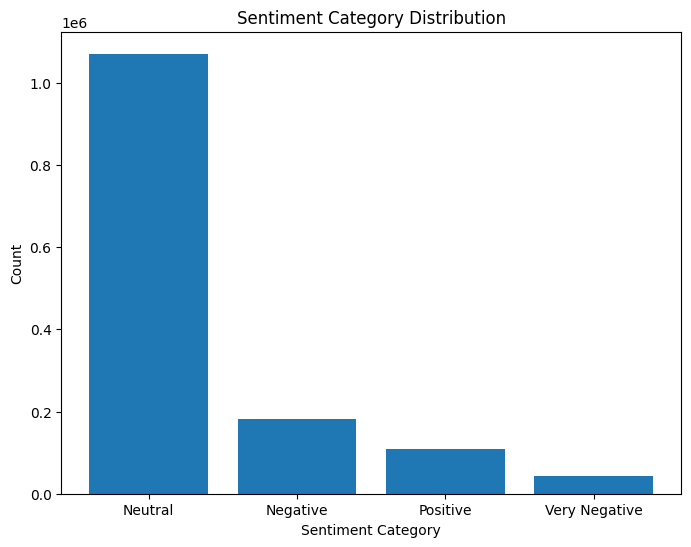

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(sentiment_data['sentiment_category'].value_counts().index, sentiment_data['sentiment_category'].value_counts())
plt.title('Sentiment Category Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

In [25]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

## Identify top keywords

In [26]:
# Extract keywords using TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(sentiment_data['headline'])
feature_names = vectorizer.get_feature_names_out()

# Print top keywords for each sentiment category
for sentiment in sentiment_data['sentiment_category'].unique():
    sentiment_data_filtered = sentiment_data[sentiment_data['sentiment_category'] == sentiment]
    tfidf_matrix_filtered = vectorizer.transform(sentiment_data_filtered['headline'])

    top_keywords = tfidf_matrix_filtered.max(axis=0).toarray()[0].argsort()[-10:][::-1]
    print(f"Top keywords for {sentiment}:")
    for i in top_keywords:
        print(feature_names[i])

Top keywords for Neutral:
nordson
games
wnr
genesco
dexcom
oopsie
tjx
pcp
ge
intuit
Top keywords for Negative:
nis3
fxcm
avoid
eur1
tivo
udr
erii
zogenix
avid
cat
Top keywords for Positive:
sexy
sem
fun
ceva
westerstar
imax
fine
xl
pyng
cnh
Top keywords for Very Negative:
sin
intraday
broken
losers
ccc
brk
liar
loathing
crime
problem
